<h1>
    Linear Regression Assignment
</h1>
<h2>
    Jeanne Nicole Gianan
    BSIT 3A
</h2>

<h2>
    🛠️ Part 1: Setup and Data Loading
</h2>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [7]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


<h2>
    🔍 Part 2: Exploratory Data Analysis (EDA)
</h2>
<p>
Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.
</p>

<h3>
    1. How many Unique job titles are there?
</h3>
<p>
    ~There are 93 job titles in the dataset
</p>

In [8]:
df["job_title"].nunique()

93

<h3>
    2. What is the average salary ('salary_in_usd') per 'work_year'?
</h3>
<p>
    ~In 2020, the average salary was 92,302.63. In 2021, it increased to 94,087.21. In 2022, the average salary rose to 133,379.51, and finally, in 2023, it reached 148,954.56.

</p>

In [9]:
df.groupby("work_year")["salary_in_usd"].mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

<h3>
    3. Create a bar plot showing average salary by 'experience_level'.
</h3>

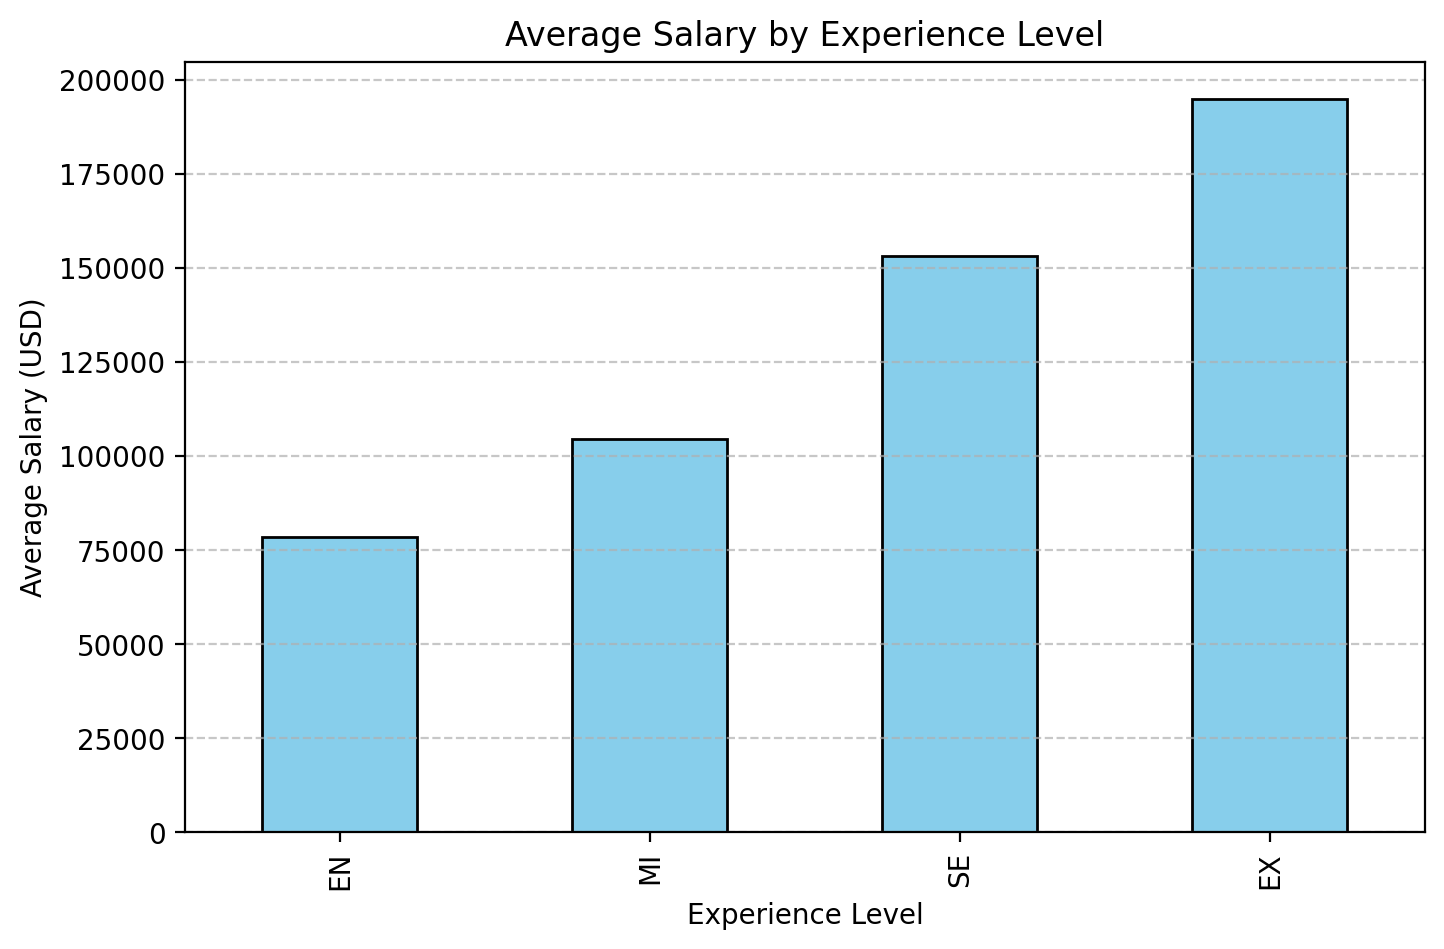

In [10]:
avg_salary_by_exp = df.groupby("experience_level")["salary_in_usd"].mean().sort_values()

plt.figure(figsize=(8,5))
avg_salary_by_exp.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<h2>
    🧹 Part 3: Data Preprocessing for Linear Regression|
</h2>
<p>
    We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!
</p>

In [15]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded', 'job_title']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded,job_title
0,2023,0,Applied Scientist
1,2023,0,Applied Scientist
2,2023,0,Data Quality Analyst
3,2023,0,Compliance Data Analyst
4,2023,0,Applied Scientist


<h2>
    📈 Part 4: Train a Linear Regression Model
</h2>

In [12]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


<h2>
    🔮 Part 5: Predict 2024 Salaries
</h2>
<p>
    Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!
</p>

In [14]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


<h2>
    📝 Part 6: Reflection (Answer in a Markdown Cell)
</h2>
<p>
    1. Does your model make reasonable predictions? Why or why not?
    2. What are the limitations of using only `work_year` and `experience_level`?
    3. How could you improve this model? (Think: more features, better encoding, etc.)
    4. Why is **R² not enough** to trust your predictions?
    
    > 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!
</p>

<h2>
    1. Does your model make reasonable preictions? Why or why not?
</h2>
<p>
    ~I think my model does not make reasonable predictions since there are still some factors that we missed so the predictions may not be accurate.
</p>
<br>
<h2>
    2. What are the limitations of using only `work_year` and `experience_level`?
</h2>
<p>
    ~The limitations of usng this variable is that this does not capture all salary deteminants making it hard to generalize due to the lack of information about context.
</p>
<br>
<h2>
    3. How could you improve this model? (Think: more features, better encoding, etc.)
</h2>
<p>
    To improve this model we can add other variables such as company_location, company_size, and employment_type to give more context for outr model to generalize.
</p>
<br>
<h2>
    4. Why is **R² not enough** to trust your predictions?
</h2>
<p>
    R² is not enough because R² only measures how well the model fits the training data,  doesn’t guarantee real-world accuracy.
</p>